In [1]:
%pip install matplotlib seaborn xlrd


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
     

In [3]:
#22022542
df = pd.read_excel('projectfinaltamlyhoctoipham11.xlsx')
print(df)

            post_id                                              title  \
0   328578473140550     🌸 CHỊU ĐỰNG TRONG IM LẶNG – The school of life   
1   328554289809635                                 Nguồn: Bright Side   
2   328530266478704  💟 “Tâm lý học nói rằng: Bạn không sợ yêu, bạn ...   
3   328513479813716  🌸 ĐỪNG TIN BỘ NÃO CỦA BẠN: TẠI SAO CHÚNG TA PH...   
4   328486706483060  “Là một nhà tâm lý trị liệu, cho phép tôi nói ...   
..              ...                                                ...   
95  316585667673164  🌸 ĐỜI THƯỜNG KÌ DIỆU: VÌ SAO ĐƯỢC SỐNG MỘT CUỘ...   
96  316206724377725  "Đây là một điều ngờ nghệch của người đời: khi...   
97  316125614385836         🌿 HIỂU VỀ SỰ THẤU CẢM - The School Of Life   
98  316081317723599            ĐỂ TỰ TIN, CÓ THỰC SỰ KHÓ ĐẾN VẬY KHÔNG   
99  316056897726041  🍀 SỰ BUÔNG XẢ TRONG PHẬT GIÁO CÓ GIÚP MỐI QUAN...   

                                                 text  \
0   🌸 CHỊU ĐỰNG TRONG IM LẶNG – The school of life... 

In [9]:
#22022542
df[['comments']]

comments
0          4
1         42
2          2
3          7
4         20
..       ...
95        34
96        24
97         3
98         9
99        29

[100 rows x 1 columns]

In [10]:
#22022542
df[['comments']].describe()

comments
count  100.000000
mean    19.830000
std     25.004264
min      0.000000
25%      3.000000
50%      9.000000
75%     27.000000
max    148.000000

In [4]:
#22022542
df_number_comment = df.loc[:,['text', 'comments','post_url']]
df_number_comment = df_number_comment.loc[(df['comments'] == 0) | (df['comments'] == 148)]
df_number_comment

text  comments  \
39  ☘ XÃ HỘI HIỆN ĐẠI ĐANG “NỮ TÍNH HÓA” ĐÀN ÔNG N...       148   
74  🌸 PSYCHOLOGY WORKSHOP (11/11/2023) (English be...         0   

                                             post_url  
39  https://facebook.com/tamlyhoctoipham/posts/324...  
74  https://facebook.com/tamlyhoctoipham/posts/319...

In [8]:
#22022542
df_number_comment = df['comments'].value_counts().sort_index()
df_number_comment = pd.DataFrame(df_number_comment)
#df_number_comment.columns['số comments','số bài post']
df_number_comment

count
comments       
0             1
1             7
2            12
3             7
4             2
5             4
6             3
7             7
8             3
9             5
11            2
12            2
14            3
15            3
17            3
19            2
20            2
21            1
22            2
24            3
27            3
28            2
29            1
31            1
34            1
37            1
38            1
42            1
44            3
47            1
48            1
49            1
54            1
56            1
60            1
67            1
78            1
84            1
98            1
99            1
148           1

<Axes: xlabel='Số comment', ylabel='Số bài có comment tương ứng'>

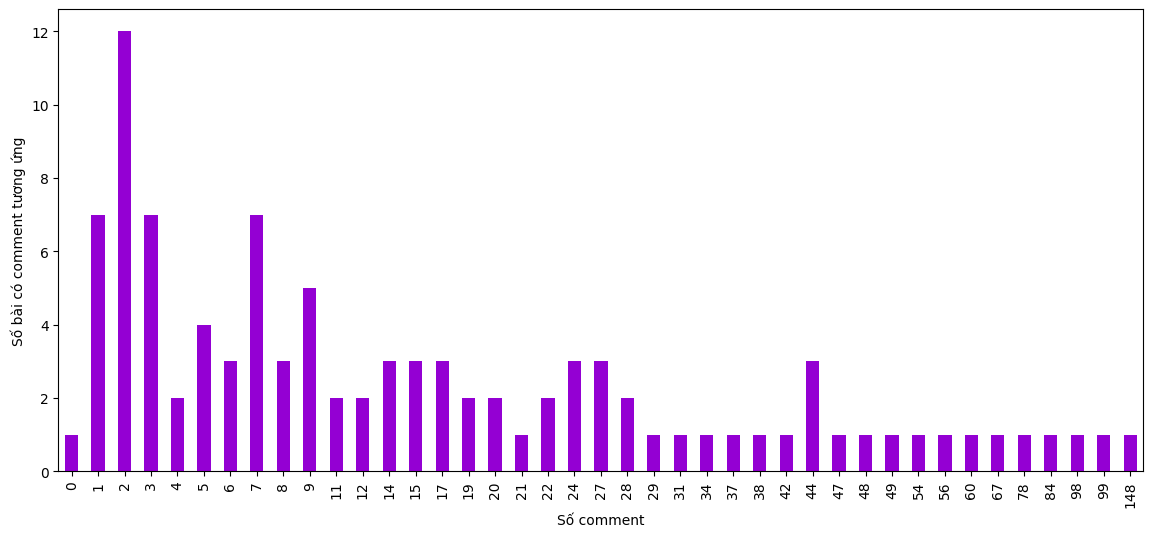

In [13]:
#22022542
df_number_comment = df['comments'].value_counts().sort_index()
df_number_comment.plot(kind="bar", figsize=(14,6), xlabel= 'Số comment', ylabel= 'Số bài có comment tương ứng', color = 'darkviolet')
#plt.savefig("numberOfCom.png")

In [15]:
#22022542
#số bài post có dưới 80 comment
df_number_comment = df['comments'].value_counts().sort_index()
sm = df_number_comment.loc[0:29].sum()
sm

80

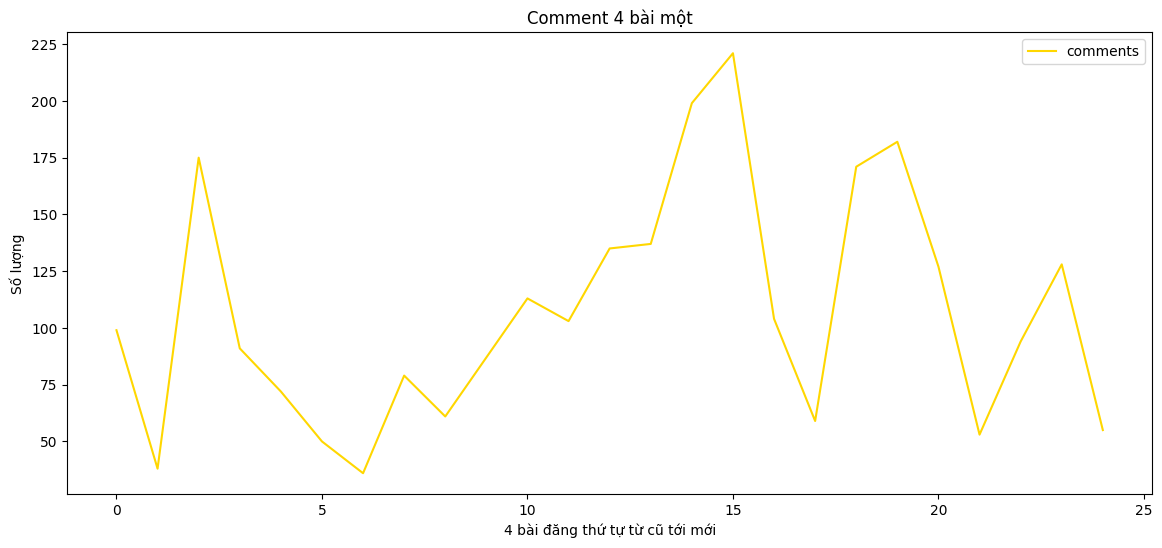

In [21]:
#show số lượng share theo bài đăng
reaction1 = pd.DataFrame(df.loc[:,['comments']].iloc[::-1].reset_index(drop=True))
sums = [reaction1.iloc[i:i+5].sum() for i in range(0, len(df), 4)]

# Chuyển đổi danh sách thành DataFrame mới
sums_df = pd.DataFrame(sums)

# Vẽ biểu đồ cột
ax = sums_df.plot(kind='line', figsize=(14, 6), color='gold',
            xlabel= '4 bài đăng thứ tự từ cũ tới mới',ylabel='Số lượng',title='Comment 4 bài một')
plt.show()

In [22]:
#22022542
#tổng số comment
df['comments'].sum()

1983

In [14]:
df['comments_full']

0     [{'comment_id': '307593878861053', 'comment_ur...
1     [{'comment_id': '1536764993803393', 'comment_u...
2     [{'comment_id': '2324664787727070', 'comment_u...
3     [{'comment_id': '1451428818753813', 'comment_u...
4     [{'comment_id': '1300208124010294', 'comment_u...
                            ...                        
95    [{'comment_id': '282626921412170', 'comment_ur...
96    [{'comment_id': '313466081297537', 'comment_ur...
97    [{'comment_id': '1045298623454591', 'comment_u...
98    [{'comment_id': '657948339736678', 'comment_ur...
99    [{'comment_id': '294283576829740', 'comment_ur...
Name: comments_full, Length: 100, dtype: object

In [40]:
res=[]
post_list=df['comments_full'].tolist()
for post in post_list:
    if (len(post) > 2):
      print(post)
      cmt = '\n'.join([comment for comment in post])
      res.append(cmt)
print(len(res))
print(res)

[{'comment_id': '307593878861053', 'comment_url': 'https://facebook.com/307593878861053', 'commenter_id': '100003620549077', 'commenter_url': 'https://facebook.com/rama.anungun?eav=AfZbGQKu-WZoF_SWc-c012t3uyiWlszGgQ1JGukagO3B91HdOlDIXm3Grnyvoaz014k&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Bcs Kẻ Cầm Cự', 'commenter_meta': None, 'comment_text': 'Càng nhiều dối trá và che đậy thì càng phải chịu đựng, nó đến từ cả cha mẹ lẫn bản thân con cái.', 'comment_time': datetime.datetime(2023, 11, 14, 23, 26), 'comment_image': None, 'comment_reactors': [], 'comment_reactions': None, 'comment_reaction_count': None, 'replies': []}, {'comment_id': '2996770813790853', 'comment_url': 'https://facebook.com/2996770813790853', 'commenter_id': '100027823337849', 'commenter_url': 'https://facebook.com/profile.php?id=100027823337849&eav=AfbRAlBTv8eBvorI2Bv2yTFTXwggblPV1RpwmVfm2BCTHxbi0lNZPdW8CceJNwe4Vls&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Phong Thành', 'commenter_met